<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [9]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
 
# 크롬 웹브라우저 실행
path = "C:/Users/홍연정/Downloads/chromedriver/chromedriver.exe"
 
driver = webdriver.Chrome(ChromeDriverManager().install())
url_list = []
content_list = ""
text = "혁신학교반대"
 
for i in range(1, 6):  # 1~2페이지까지의 블로그 내용을 읽어옴
    url = 'https://section.blog.naver.com/Search/Post.nhn?pageNo='+ str(i) + '&rangeType=ALL&orderBy=sim&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
 
    for j in range(1, 6): # 각 블로그 주소 저장
        titles = driver.find_element_by_xpath('/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)
 
print("url 수집 끝, 해당 url 데이터 크롤링")
 
for url in url_list: # 수집한 url 만큼 반복
    driver.get(url) # 해당 url로 이동
 
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements_by_css_selector(overlays)
 
    for content in contents:
        content_list = content_list + content.text



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST chromedriver version for 96.0.4664 google-chrome
Driver [C:\Users\홍연정\.wdm\drivers\chromedriver\win32\96.0.4664.45\chromedriver.exe] found in cache


url 수집 끝, 해당 url 데이터 크롤링


In [3]:
content_list

'안녕하세요~\n삼형제 슈퍼맘 조세핀샘입니다!최근 역삼동에 수업하러 다니면서 도성초등학교 \n앞에 화환이 잔뜩 줄지어 놓여있는 것을 봤습니다.모듈러 교실로 검색을 해봤더니\n목동초등학교도 비슷한 시위를 하고 있더군요.노후된 학교 시설을 개선하여 \n학생들에게 안전하고 쾌적한 교육공간을\n만들어 주는 사업입니다.현재 그린스마트 미래학교를 반대하는 가장 큰 이유는\n그린스마트 미래학교를 서울형혁신학교로 \n간주하고 있는 것 같더라구요.\n제가 수업하고 있는 학생의 어머님께 \n혁신학교를 반대하는 이유를 물어봤습죠.\n혁신학교가 되면 \n학업 성취와는 다소 거리 먼\n자유로운 교과과정을 운영을 할텐데 \n초등학교 때는 혁신, 창의성 운운하면서 놀다가 \n중학교, 고등학교 때 입시 준비하려면 \n엄마도 아이들도 더 힘들지 않겠느냐고 하더라구요.\n대학입시는 바뀌지 않으면서\n초등학교만 혁신학교로 바꾸면 뭐하냐며...두번째 이유는 공사기간 중에 아이들이 모듈러교실에서 수업을 받게 되는데 위험하지 않겠냐는 것입니다.\n그래서 서울시 교육청 홈페이지를 방문해서\n자세하게 알아봤습니다.이웃님들 생각은 어떠신가요?더 자세한 사항이 궁금하신 분은 \n서울시 교육청 홈페이지를 방문해보세요~\nhttps://www.sen.go.kr/main/services/index/index.action"조희연式 혁신학교, 일반학교와 차이 없다"\n서울형 혁신학교 효과 분석\n"만족도ㆍ창의성 등 차이 미미"\n올 혁신학교 확대 방침에 마곡중 등 학부모 반대 집회\n(한국경제, 19. 7. 24 A29면)2010년 6·2 서울교육감 선거에서 진보단일후보 곽노현은 1.1% 표차이로 보수 후보를 누르고 당선됐다. 보수 후보의 분열은 뼈아픈 패인이었다. 그렇게 서울 최초 진보교육감이 탄생하였다. 나아가 서울 진보교육감의 출현은 전국 최초 진보교육감인 경기도 김상곤 교육감을 위시해 강원, 전남, 전북, 광주 진보교육감과 함께 진보교육벨트를 형성하는 쾌거였다. 이는 다가오는 2014년 6·4 교육감 선거 

In [4]:
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager, rc
font_path = 'c:/Windows/Fonts/malgun.ttf'

t = Okt()

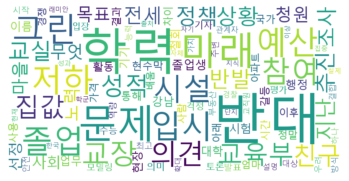

In [11]:
tokens_const = t.nouns(content_list)
stopwords = ['학교', '중학교', '혁신', '아이', '서울시', '지정', '서울', '교육청', '마트', '위해', '경원', '초등학교', '교육과정',
             '생각', '이야기', '도입', '이유', '학년', '대한', '때문', '학부모', '수업', '학생', '학습', '교사', '선생님',
             '교육', '지역', '제대로', '내용', '경우', '운영', '사업', '우리', '교육감', '경기도', '스마트', '중심', '평택', '고등학교',
             '진행', '일부', '공부', '활용', '위주', '준비', '동의', '최근', '주민', '다른', '지금', '대해', '사실', '지닌', '인근']
tokens_const = [token for token in tokens_const if token not in stopwords and len(token) > 1 ]

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1
    
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 130,
    width = 800,
    height=400,
    background_color='white',
    max_words=100)

wordcloud.generate_from_frequencies(const_cnt)
wordcloud.to_file("혁신학교 반대_final.png")

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [12]:
const_cnt

{'제목': 3,
 '삼성': 2,
 '물산': 4,
 '래미안': 7,
 '국가': 9,
 '고객': 3,
 '만족도': 6,
 '조사': 11,
 '연속': 3,
 '한국': 7,
 '생산': 2,
 '부가': 1,
 '주관': 1,
 '아파트': 9,
 '부분': 6,
 '기록': 1,
 '브랜드': 2,
 '시작': 8,
 '이후': 9,
 '차지': 2,
 '업계': 2,
 '최초': 2,
 '대상': 8,
 '서비스': 2,
 '헤스티아': 1,
 '차별': 2,
 '제공': 3,
 '정도': 4,
 '홍보': 2,
 '박수': 1,
 '실제': 7,
 '조경': 1,
 '커뮤니티': 1,
 '시설': 15,
 '정말': 9,
 '투스': 1,
 '퍼스': 1,
 '전세': 11,
 '시대': 2,
 '씨비오': 1,
 '비록': 1,
 '신축': 1,
 '대장': 1,
 '단지': 7,
 '한해': 1,
 '형성': 2,
 '여파': 1,
 '계속': 4,
 '동일': 1,
 '입지': 1,
 '아래': 9,
 '근처': 3,
 '상방': 1,
 '가격': 9,
 '매매': 2,
 '고집': 2,
 '지인': 2,
 '최저': 4,
 '평형': 2,
 '강북구': 1,
 '롯데': 1,
 '캐슬': 1,
 '공동': 2,
 '구로구': 3,
 '신도림동': 1,
 '은평구': 1,
 '힐즈': 1,
 '강서구': 1,
 '한세상': 1,
 '염창': 1,
 '최고': 8,
 '서초구': 6,
 '아크': 1,
 '리버': 1,
 '파크': 1,
 '강남구': 2,
 '도곡': 1,
 '카운티': 1,
 '송파구': 3,
 '리센츠': 1,
 '가의': 1,
 '차이': 9,
 '이제': 4,
 '가도': 2,
 '학군': 7,
 '마다': 2,
 '결사': 3,
 '반대': 56,
 '레이': 1,
 '리오': 1,
 '김상곤': 2,
 '진보': 5,
 '성향': 3,
 '전인': 4,
 '표방': 1,
 '자율': 6,
 '최대': 1,
 '추

In [16]:
import operator
dic = sorted(const_cnt.items(), reverse=True, key=operator.itemgetter(1))
dic

[('반대', 56),
 ('학력', 44),
 ('문제', 26),
 ('미래', 25),
 ('그린', 18),
 ('예산', 17),
 ('입시', 17),
 ('저하', 17),
 ('졸업', 17),
 ('시설', 15),
 ('참여', 15),
 ('교장', 14),
 ('의견', 14),
 ('교육부', 14),
 ('집값', 14),
 ('성적', 13),
 ('친구', 13),
 ('교실', 13),
 ('정책', 12),
 ('상황', 12),
 ('반발', 12),
 ('지난', 12),
 ('추진', 12),
 ('조사', 11),
 ('전세', 11),
 ('목표', 11),
 ('노력', 11),
 ('마을', 11),
 ('청원', 11),
 ('무엇', 11),
 ('사회', 11),
 ('선정', 11),
 ('졸업생', 11),
 ('이름', 10),
 ('강남', 10),
 ('철회', 10),
 ('업무', 10),
 ('행정', 10),
 ('시험', 10),
 ('대학', 10),
 ('현장', 10),
 ('기기', 10),
 ('현수막', 10),
 ('통해', 10),
 ('활동', 10),
 ('사용', 10),
 ('시간', 10),
 ('갈등', 10),
 ('국가', 9),
 ('아파트', 9),
 ('이후', 9),
 ('정말', 9),
 ('아래', 9),
 ('가격', 9),
 ('차이', 9),
 ('결과', 9),
 ('사람', 9),
 ('엄마', 9),
 ('배움', 9),
 ('경쟁', 9),
 ('의미', 9),
 ('수능', 9),
 ('토론', 9),
 ('기자', 9),
 ('모델링', 9),
 ('입장', 9),
 ('걱정', 9),
 ('평가', 9),
 ('발표', 9),
 ('역량', 9),
 ('시작', 8),
 ('대상', 8),
 ('최고', 8),
 ('부동산', 8),
 ('주변', 8),
 ('능력', 8),
 ('결합', 8),
 ('하나', 8),
 ('방식', 8)

In [24]:
import pandas as pd
df = pd.DataFrame(dic)
df.columns = ['단어', '빈도수']
df.head(18)

,단어,빈도수
0,반대,56
1,학력,44
2,문제,26
3,미래,25
4,그린,18
5,예산,17
6,입시,17
7,저하,17
8,졸업,17
9,시설,15
